In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
#Loadthedataset
df=pd.read_csv('/content/Daily Household Transactions (1).csv')
 #Displaythefirst fewrowsof thedataset
df.head(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20-09-2018,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20-09-2018,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19-09-2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17-09-2018,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16-09-2018,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,15-09-2018,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR
6,14-09-2018,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.0,Expense,INR
7,13-09-2018,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR
8,13-09-2018,Credit Card,Other,NaN,HBR 2 Months subscription,83.0,Expense,INR
9,13-09-2018,Cash,Food,Grocery,1kg atta,46.0,Expense,INR


In [39]:
#Checkformissingvalues
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [41]:
df[df.isnull().any(axis=1)]

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
8,13-09-2018,Credit Card,Other,NaN,HBR 2 Months subscription,83.0,Expense,INR
10,13-09-2018,Saving Bank account 1,Small Cap fund 2,NaN,NaN,5000.0,Transfer-Out,INR
11,13-09-2018,Saving Bank account 1,Small cap fund 1,NaN,NaN,5000.0,Transfer-Out,INR
14,11-09-2018,Saving Bank account 1,Other,NaN,From Family,3500.0,Income,INR
17,08-09-2018,Cash,Family,Pocket money,NaN,40.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,01-01-2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,01-01-2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,01-01-2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,01-01-2015,Cash,Food,NaN,tea,10.0,Expense,INR


In [42]:
# Fill Subcategory with its mode
df['Subcategory']=df['Subcategory'].fillna(df['Subcategory'].mode()[0])


In [43]:
df['Note']=df['Note'].fillna('No Notes')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     2461 non-null   object 
 4   Note            2461 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [45]:
#Convertdatatypes
df['Date'] = pd.to_datetime(df['Date']) #dayfirst=True, errors='coerce')


df['Amount']=df['Amount'].astype(float)

In [46]:
df['Date'].nunique()

896

In [47]:
 #Removeduplicates
 #df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

np.int64(11)

In [49]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2456,False
2457,False
2458,False
2459,False


In [50]:
df[df.duplicated()]

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
768,2017-12-01,Saving Bank account 1,Recurring Deposit,Milk,No Notes,1000.0,Transfer-Out,INR
868,2017-11-01,Saving Bank account 1,Recurring Deposit,Milk,No Notes,1000.0,Transfer-Out,INR
922,2017-10-01,Saving Bank account 1,Recurring Deposit,Milk,No Notes,1000.0,Transfer-Out,INR
1007,2017-09-01,Saving Bank account 1,Recurring Deposit,Milk,No Notes,1000.0,Transfer-Out,INR
1109,2017-08-01,Saving Bank account 1,Recurring Deposit,Milk,No Notes,1000.0,Transfer-Out,INR
1210,2017-07-01,Saving Bank account 1,Recurring Deposit,Milk,No Notes,1000.0,Transfer-Out,INR
1341,2017-05-18,Cash,Food,Tea,No Notes,10.0,Expense,INR
1362,2017-05-12,Cash,Food,Tea,No Notes,10.0,Expense,INR
1652,2017-01-29,Cash,Transportation,auto,within city,30.0,Expense,INR
1816,2016-11-10,Saving Bank account 1,Investment,Mutual fund,No Notes,1000.0,Expense,INR


In [51]:
#remove duplicate rows
df.drop_duplicates(inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2450 non-null   datetime64[ns]
 1   Mode            2450 non-null   object        
 2   Category        2450 non-null   object        
 3   Subcategory     2450 non-null   object        
 4   Note            2450 non-null   object        
 5   Amount          2450 non-null   float64       
 6   Income/Expense  2450 non-null   object        
 7   Currency        2450 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 172.3+ KB


In [53]:
df.dtypes

,0
Date,datetime64[ns]
Mode,object
Category,object
Subcategory,object
Note,object
Amount,float64
Income/Expense,object
Currency,object


ExploratoryDataAnalysis(EDA)


In [54]:
df.describe()

,Date,Amount
count,2450,2450.000000
mean,2017-04-03 10:15:58.040816384,2760.211747
min,2015-01-01 00:00:00,2.000000
25%,2016-10-15 12:00:00,35.000000
50%,2017-06-24 12:00:00,100.000000
75%,2018-01-16 00:00:00,785.500000
max,2018-09-20 00:00:00,250000.000000
std,NaN,12546.933575


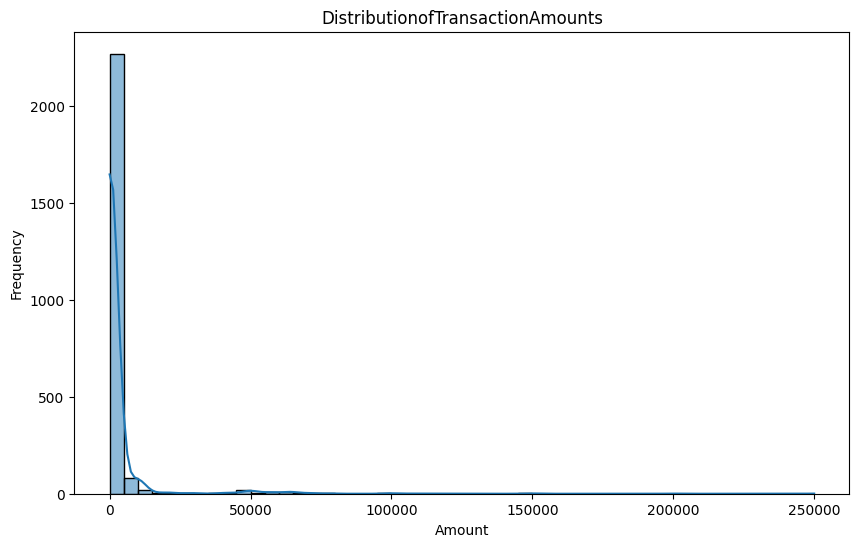

In [55]:
#Distribution of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'],bins=50,kde=True)
plt.title('DistributionofTransactionAmounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

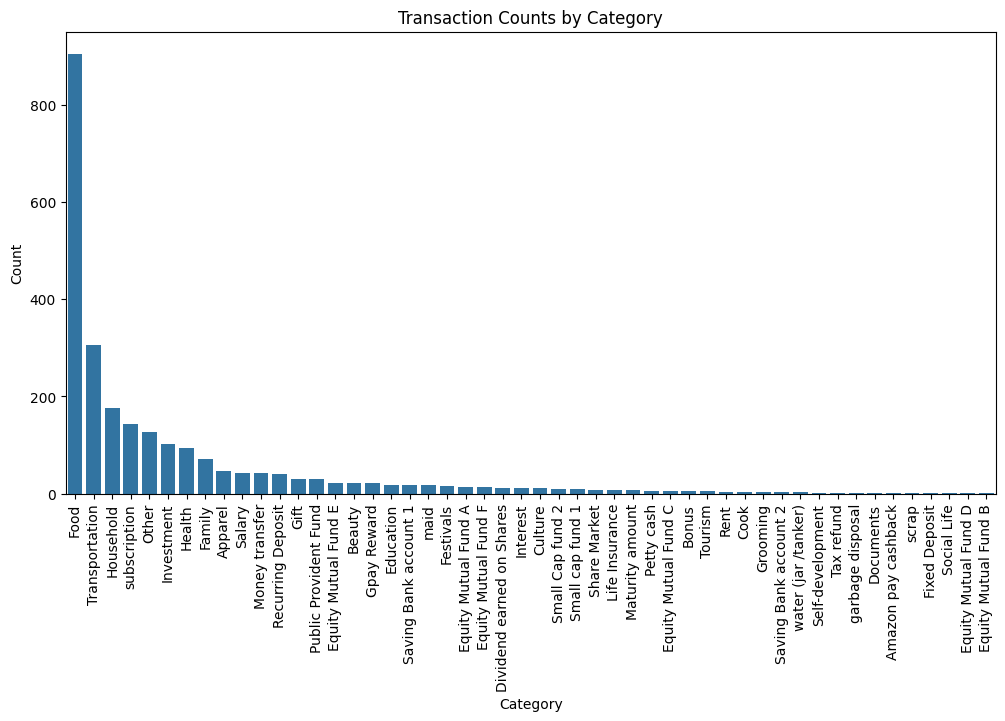

In [56]:
#Transaction counts by category
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Category',order=df['Category'].value_counts().index)
plt.title('Transaction Counts by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

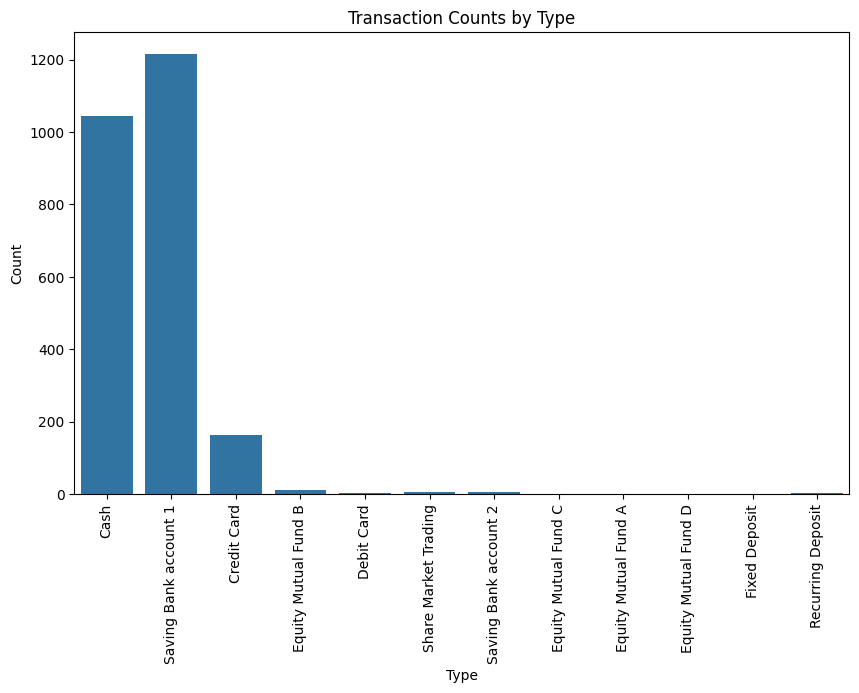

In [57]:
# Transaction counts by type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mode')
plt.title('Transaction Counts by Type')
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Time Series Analysis
 ● Trend analysis.
 ● Monthly and daily trends

In [58]:
 # Resample data to monthly frequency
monthly_data = df.resample('m', on='Date').sum()
monthly_data.head()

,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
Date,,,,,,,
2015-01-31,Credit CardCashCashCashCashCashCashCashCashCas...,FoodTransportationTransportationCultureFoodTra...,MilkMilkMilkMilkMilkMilkMilkMilkMilkMilkMilkMi...,bendys chicken biryanishare jeep - Place T top...,33870.0,ExpenseExpenseExpenseExpenseExpenseExpenseExpe...,INRINRINRINRINRINRINRINRINRINRINRINRINRINRINRI...
2015-02-28,CashCashCashSaving Bank account 1CashCashCashC...,FoodHouseholdApparelOtherFoodFoodFoodFoodFoodO...,MilkMilkMilkMilkMilkMilkMilkMilkMilkMilkMilkMi...,milk half shaktielectricity billundergarmentsP...,74114.0,ExpenseExpenseExpenseExpenseExpenseExpenseExpe...,INRINRINRINRINRINRINRINRINRINRINRINRINRINRINRI...
2015-03-31,CashCashSaving Bank account 1CashCashSaving Ba...,FoodFoodFoodFoodFoodMoney transferRentHealthHe...,fruitsDinnerLunchTeaTeaMilkMilkMedicineHospita...,bananasAt restaurantchicken manchow soupNo Not...,103437.4,ExpenseExpenseExpenseExpenseExpenseExpenseExpe...,INRINRINRINRINRINRINRINRINRINRINRINRINRINRINRI...
2015-04-30,CashCashCashCredit CardCashCashSaving Bank acc...,FoodCookFoodFoodOthergarbage disposalMoney tra...,GroceryMilkGroceryGroceryMilkMilkMilkMutual fu...,toothbrush + biscuitsNo NotesNo NotesNo Notesc...,73528.0,ExpenseExpenseExpenseExpenseExpenseExpenseExpe...,INRINRINRINRINRINRINRINRINRINRINRINRINRINRINRI...
2015-05-31,CashCredit CardCashSaving Bank account 1Saving...,FoodMoney transferFoodPublic Provident FundFoo...,GroceryMilkMilkMilkGroceryMilkMutual fundMilkG...,dahiNo Notesmilk half shaktiApril -May 10k con...,110977.0,ExpenseExpenseExpenseExpenseExpenseExpenseExpe...,INRINRINRINRINRINRINRINRINRINRINRINRINRINRINRI...


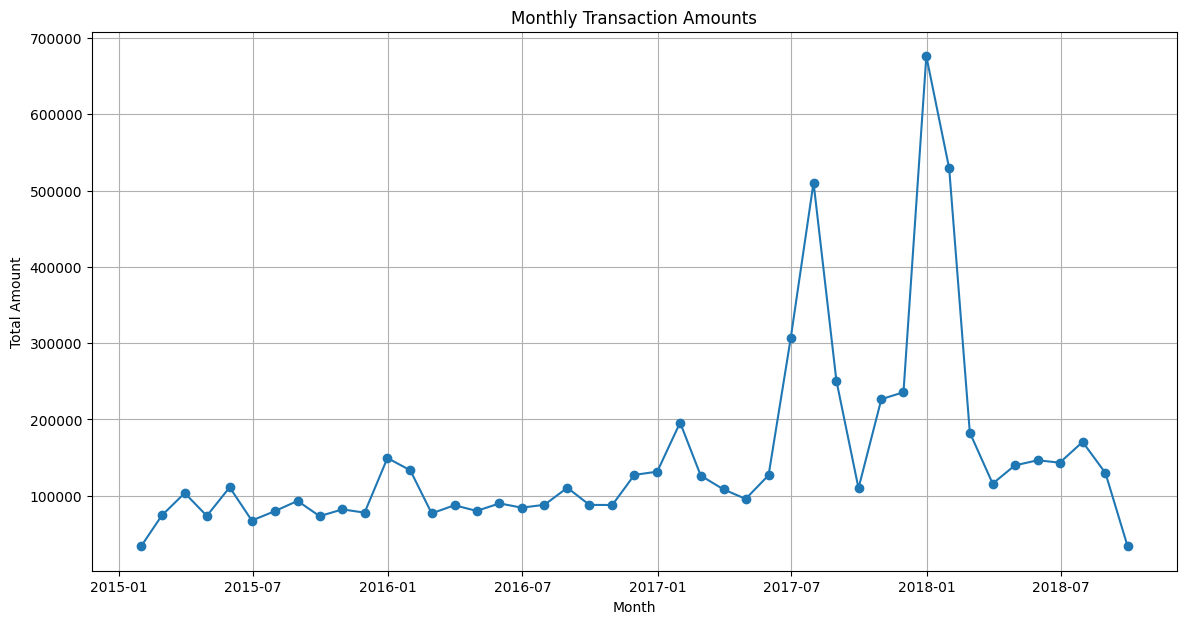

In [59]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [60]:
# Daily trends
daily_data = df.groupby(df['Date'].dt.date).sum(numeric_only=True)

daily_data

,Amount
Date,
2015-01-01,952.0
2015-01-02,10104.0
2015-01-03,622.0
2015-01-04,10230.0
2015-01-05,5551.0
...,...
2018-09-15,200.0
2018-09-16,251.0
2018-09-17,19.0


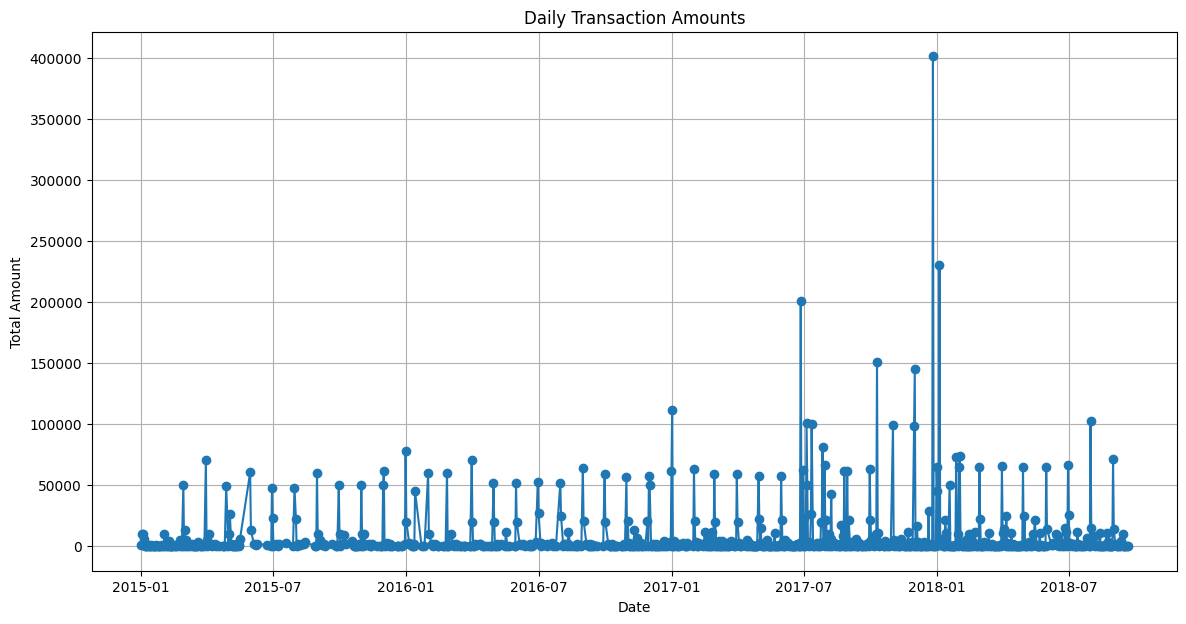

In [61]:
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Correlation Analysis
## ● Analyze the correlation between transaction categories and amounts.



In [62]:
# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
 aggfunc='sum', fill_value=0)
pivot_table.head()

Category,Amazon pay cashback,Apparel,Beauty,Bonus,Cook,Culture,Dividend earned on Shares,Documents,Education,Equity Mutual Fund A,...,Small cap fund 1,Social Life,Tax refund,Tourism,Transportation,garbage disposal,maid,scrap,subscription,water (jar /tanker)
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,302.0,0.0,0.0,0.0,0.0,0.0
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
 # Calculate correlation matrix
correlation_matrix = pivot_table.corr()
correlation_matrix.head()

Category,Amazon pay cashback,Apparel,Beauty,Bonus,Cook,Culture,Dividend earned on Shares,Documents,Education,Equity Mutual Fund A,...,Small cap fund 1,Social Life,Tax refund,Tourism,Transportation,garbage disposal,maid,scrap,subscription,water (jar /tanker)
Category,,,,,,,,,,,,,,,,,,,,,
Amazon pay cashback,1.000000,-0.004003,-0.002454,-0.001739,-0.002077,-0.003646,-0.003336,-0.001724,-0.003555,-0.001502,...,-0.003872,-0.001218,-0.001553,-0.001635,-0.001137,-0.001546,-0.004431,-0.001334,0.005689,-0.001616
Apparel,-0.004003,1.000000,-0.007393,-0.005240,-0.006259,0.010953,-0.007240,-0.005195,-0.000359,-0.001992,...,-0.005199,-0.003671,-0.004680,-0.004082,-0.003414,-0.004659,0.012124,-0.003025,-0.013053,-0.004869
Beauty,-0.002454,-0.007393,1.000000,-0.003212,-0.003836,0.012006,-0.006161,-0.003184,0.002614,-0.002774,...,-0.007152,-0.002250,-0.002869,-0.003019,-0.005542,-0.002856,-0.008184,-0.002463,-0.007101,-0.002984
Bonus,-0.001739,-0.005240,-0.003212,1.000000,-0.002719,-0.004773,-0.004366,-0.002257,-0.004653,-0.001966,...,-0.005068,-0.001595,-0.002033,-0.002140,-0.004014,-0.002024,-0.005800,-0.001746,-0.005764,-0.002115
Cook,-0.002077,-0.006259,-0.003836,-0.002719,1.000000,-0.005701,-0.005216,-0.002695,-0.005558,-0.002348,...,-0.006054,-0.001905,-0.002428,-0.002556,-0.004795,0.071214,0.005753,-0.002085,-0.007000,0.218767


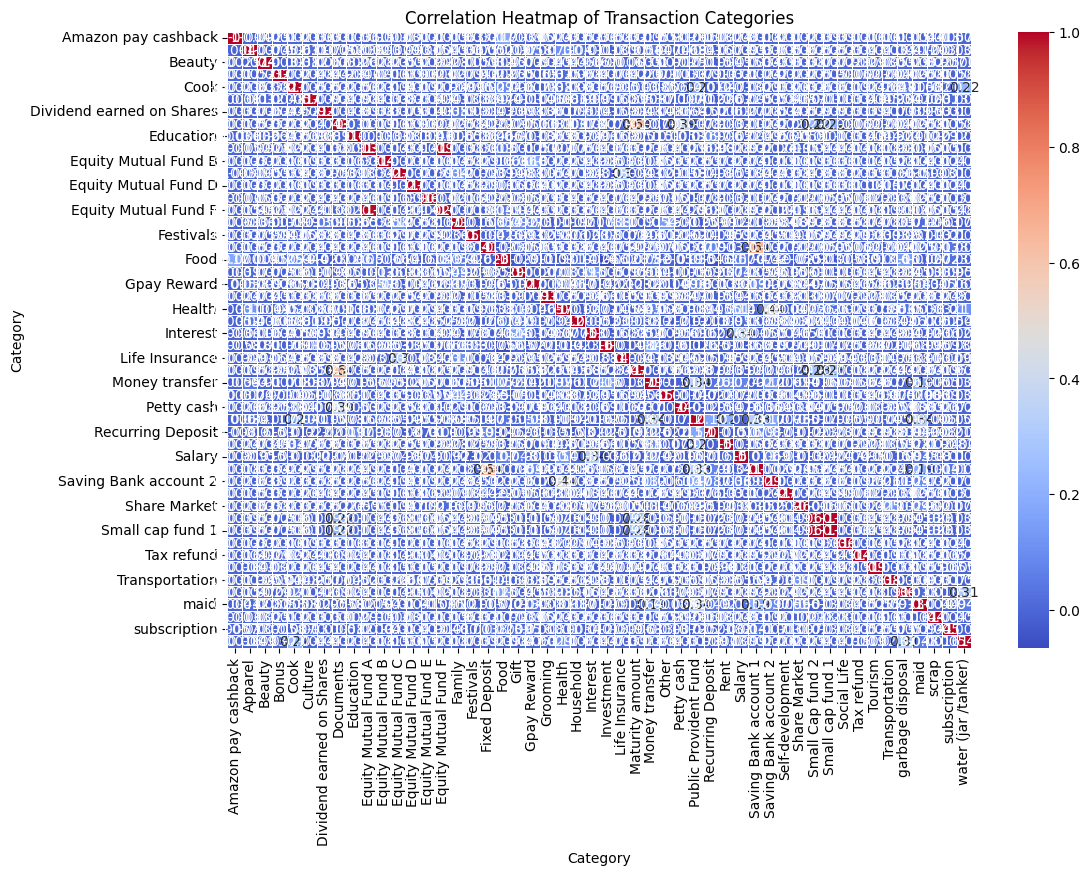

In [64]:
#Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()